## EIA Monthly Electric Grid Data - CO2 Emissions Intensity Model

Goal:  predict how adding X megawatts of solar or wind generation capacity within a Balancing Authority (BA) will affect CO2 emissions per megawatt-hour generated

Monthly generation capacity and operations data was retrieved from the U.S. Energy Information Administration API

See gencap_EDA_prep and genops_EDA_prep for data cleaning and transformation

In [1832]:
import pandas as pd
import numpy as np

# load balancing authority generation configuration and operation (output) files to data frames
explan_path = 'genconf.csv'
resp_path = 'genout.csv'
genconf = pd.read_csv(explan_path, low_memory=False)
genout = pd.read_csv(resp_path, low_memory=False)

"genconf" holds monthly generation configuration data for each BA. Columns named with EIA energy source codes contain total installed generation capacity for that energy source. "av_lat" and "av_lon" contain the mean location of power plants in the BA.

In [1833]:
genconf.head()

,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599


Normalize installed capacity for each energy source as a proportion of total capacity

In [1834]:
# calculate total generation capacity per row
genconf['total_cap_mw'] = genconf.drop(['av_lat','av_lon'], axis=1).sum(axis=1, numeric_only=True)

In [1835]:
genconf.head().T

,0,1,2,3,4
ba_code,AEC,AEC,AEC,AEC,AEC
period,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01
BIT,538.0,538.0,538.0,538.0,538.0
DFO,0.0,0.0,0.0,0.0,0.0
GEO,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.0,0.0,0.0
KER,0.0,0.0,0.0,0.0,0.0
LIG,0.0,0.0,0.0,0.0,0.0
MSW,0.0,0.0,0.0,0.0,0.0
NG,1330.0,1330.0,1330.0,1330.0,1330.0


In [1836]:
# divide capacity per energy source by total capacity
#genconf['total_cap_mw_temp'] = genconf['total_cap_mw']
genconf_norm = genconf[['ba_code','period','av_lat','av_lon','total_cap_mw']].join(genconf.drop(['av_lat','av_lon'], axis=1).select_dtypes \
                                                               (include=np.number).apply(lambda x : x/genconf['total_cap_mw']) \
                                                                .drop(columns=['total_cap_mw']))
genconf_norm.head()

,ba_code,period,av_lat,av_lon,total_cap_mw,BIT,DFO,GEO,JF,KER,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
0,AEC,2013-01-01,31.264961,-86.674599,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
1,AEC,2013-02-01,31.264961,-86.674599,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
2,AEC,2013-03-01,31.264961,-86.674599,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
3,AEC,2013-04-01,31.264961,-86.674599,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
4,AEC,2013-05-01,31.264961,-86.674599,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0


Normalize average latitude and longitude features

In [1837]:
#normalize latitude to range 0,1
genconf_norm['av_lat'] = genconf_norm['av_lat'].apply(lambda x: (x-genconf_norm['av_lat'].min())/(genconf_norm['av_lat'].max() \
                                                                       - genconf_norm['av_lat'].min()))

In [1838]:
#normalize longitude to range 0,1
genconf_norm['av_lon'] = genconf_norm['av_lon'].apply(lambda x: (x-genconf_norm['av_lon'].min())/(genconf_norm['av_lon'].max() \
                                                                       - genconf_norm['av_lon'].min()))

In [1839]:
genconf_norm.head()

,ba_code,period,av_lat,av_lon,total_cap_mw,BIT,DFO,GEO,JF,KER,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
0,AEC,2013-01-01,0.247995,0.704795,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
1,AEC,2013-02-01,0.247995,0.704795,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
2,AEC,2013-03-01,0.247995,0.704795,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
3,AEC,2013-04-01,0.247995,0.704795,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
4,AEC,2013-05-01,0.247995,0.704795,1881.0,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0


"genout" contains monthly data for each BA:  net electricity generated (megawatt-hours), CO2 emitted (metric kilotons), and Carbon Intensity aka specific CO2 emission (kilograms per megawatt-hour)

In [1840]:
genout.head()

,Unnamed: 0,period,ba_code,gen_mwh,co2_kton,kg_co2_per_mwh
0,0,2011-10-01,AECI,89375.94,5.319134,59.514158
1,1,2011-10-01,AVA,126924.36,43.122421,339.748972
2,2,2011-10-01,AZPS,1577691.52,1425.363357,903.448703
3,3,2011-10-01,BANC,17864.18,3.974493,222.483953
4,4,2011-10-01,BPAT,881106.62,79.474312,90.198292


In [1841]:
genout = genout[['ba_code', 'period', 'gen_mwh', 'co2_kton', 'kg_co2_per_mwh']]

In [1842]:
genout.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh
0,AECI,2011-10-01,89375.94,5.319134,59.514158
1,AVA,2011-10-01,126924.36,43.122421,339.748972
2,AZPS,2011-10-01,1577691.52,1425.363357,903.448703
3,BANC,2011-10-01,17864.18,3.974493,222.483953
4,BPAT,2011-10-01,881106.62,79.474312,90.198292


Normalize electricity generated as a proportion of total capacity. Intent is to use this as a feature representing how much of its capacity a BA used on average.

In [1843]:
# join total generation capacity to genout
genout_norm = genout.set_index(['ba_code','period']).join(genconf[['ba_code','period','total_cap_mw']].set_index(['ba_code','period']))
genout_norm.head()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw
ba_code,period,,,,
AECI,2011-10-01,89375.94,5.319134,59.514158,NaN
AVA,2011-10-01,126924.36,43.122421,339.748972,NaN
AZPS,2011-10-01,1577691.52,1425.363357,903.448703,NaN
BANC,2011-10-01,17864.18,3.974493,222.483953,NaN
BPAT,2011-10-01,881106.62,79.474312,90.198292,NaN


In [1844]:
genout_norm.shape

(7656, 4)

In [1845]:
genout_norm.isna().sum()

gen_mwh              0
co2_kton             0
kg_co2_per_mwh     167
total_cap_mw      1160
dtype: int64

In [1846]:
genout_norm.dropna()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw
ba_code,period,,,,
AEC,2013-01-01,851290.86,447.537907,525.716800,1881.0
AECI,2013-01-01,3220134.96,2953.802481,917.291517,6107.4
AVA,2013-01-01,807299.78,116.886088,144.786473,2008.5
AZPS,2013-01-01,1572053.50,1365.636525,868.695961,6915.3
BANC,2013-01-01,35853.40,2.175765,60.685040,2762.0
...,...,...,...,...,...
TEC,2022-12-01,1771046.01,841.660123,475.233347,178.7
TEPC,2022-12-01,1771968.52,1731.628946,977.234599,171.7
TVA,2022-12-01,11837943.20,3733.005465,315.342404,1057.0


In [1847]:
# normalize using capacity * time, i.e. how much could a BA generate in a month if 
# running all generators at 100% capacity
# using 31 days per month in an effort to keep result <= 1.
genout_norm['avg_mw_per_cap'] = genout_norm['gen_mwh']/(genout_norm['total_cap_mw']*31*24)

In [1848]:
genout_norm.tail()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap
ba_code,period,,,,,
TEPC,2022-12-01,1771968.52,1731.628946,977.234599,171.7,13.871160
TVA,2022-12-01,11837943.20,3733.005465,315.342404,1057.0,15.053183
WACM,2022-12-01,2976114.00,2846.266205,956.370020,3313.0,1.207411
WALC,2022-12-01,2353672.00,748.334332,317.943338,2032.2,1.556706
WAUE,2022-12-01,87898.00,92.679548,1054.398826,NaN,NaN


In [1849]:
genout_norm = genout_norm.reset_index()

<Axes: xlabel='period'>

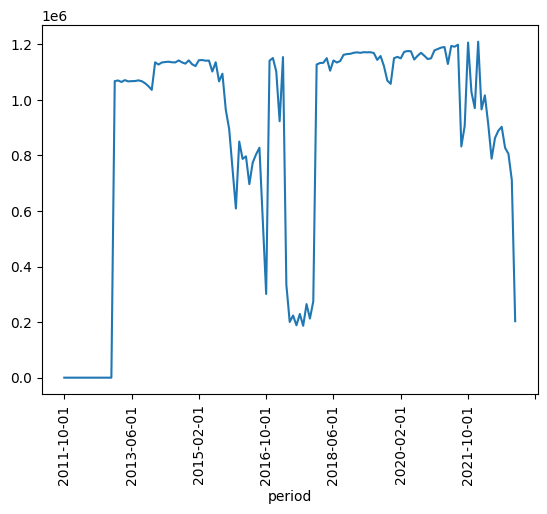

In [1850]:
genout_norm.groupby('period')['total_cap_mw'].sum().plot(x='period',y='total_cap_mw', rot=90)

Based on above, suspect missing data in 2022. EIA website states that data is not finalized until the fall following the reporting year.

In [1851]:
# remove rows with nonsense generation values (generation exceeds reported capacity)
genout_norm = genout_norm[genout_norm.avg_mw_per_cap <= 1]

In [1852]:
genout_norm.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap
876,AEC,2013-01-01,851290.86,447.537907,525.716800,1881.0,0.608298
877,AECI,2013-01-01,3220134.96,2953.802481,917.291517,6107.4,0.708671
878,AVA,2013-01-01,807299.78,116.886088,144.786473,2008.5,0.540244
879,AZPS,2013-01-01,1572053.50,1365.636525,868.695961,6915.3,0.305551
880,BANC,2013-01-01,35853.40,2.175765,60.685040,2762.0,0.017448


Join generation configuration and generation output data frames 

In [1853]:
gen_norm = genconf_norm.drop(columns='total_cap_mw').set_index(['ba_code', 'period']).join(genout_norm \
                                                              .set_index(['ba_code', 'period']))

In [1854]:
gen_norm.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG   
ba_code period                                                              
AEC     2013-01-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0  \
        2013-02-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-03-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-04-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-05-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   

                    MSW        NG  ...  TDF       WAT   WC  WND   WO   
ba_code period                     ...                                 
AEC     2013-01-01  0.0  0.707071  ...  0.0  0.004359  0.0  0.0  0.0  \
        2013-02-01  0.0  0.707071  ...  0.0  0.004359  0.0  0.0  0.0   
        2013-03-01  0.0  0.707071  ...  0.0  0.004359  0.0  0.0  0.0   
        2013-04-01  0.0  0.707071  ...  0.0  0.004359  0.0  0.0  0.0   
        2013-05-01  0.0  0.707071  ...  0.0  0.004359  0.0  0.0  0.0   

                      gen_mwh    co2_kton  kg_co2_per_mwh  total_cap_mw   
ba_code period                                                            
AEC     2013-01-01  851290.86  447.537907      525.716800        1881.0  \
        2013-02-01  827083.18  451.042088      545.340661        1881.0   
        2013-03-01  658524.00  253.791069      385.393803        1881.0   
        2013-04-01  298048.22  118.591618      397.894067        1881.0   
        2013-05-01   71425.16   44.451702      622.353546        1881.0   

                    avg_mw_per_cap  
ba_code period                      
AEC     2013-01-01        0.608298  
        2013-02-01        0.591000  
        2013-03-01        0.470554  
        2013-04-01        0.212973  
        2013-05-01        0.051038  

[5 rows x 31 columns]

In [1855]:
gen_norm = gen_norm.reset_index()

In [1856]:
ng_price_path = 'NG_price.csv'
ng_price = pd.read_csv(ng_price_path, low_memory=False)
ng_price.head()

,period,NG_price
0,1997-01-01,3.45
1,1997-02-01,2.15
2,1997-03-01,1.89
3,1997-04-01,2.03
4,1997-05-01,2.25


In [1857]:
gen_norm = gen_norm.set_index(['period']).join(ng_price.set_index('period')).reset_index()

In [1858]:
gen_norm.head()

,period,ba_code,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,WAT,WC,WND,WO,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap,NG_price
0,2013-01-01,AEC,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,0.0,...,0.004359,0.0,0.000000,0.0,851290.86,447.537907,525.716800,1881.0,0.608298,3.33
1,2013-01-01,AECI,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,0.0,...,0.017389,0.0,0.051167,0.0,3220134.96,2953.802481,917.291517,6107.4,0.708671,3.33
2,2013-01-01,AVA,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,0.0,...,0.575952,0.0,0.052427,0.0,807299.78,116.886088,144.786473,2008.5,0.540244,3.33
3,2013-01-01,AZPS,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.025205,0.0,1572053.50,1365.636525,868.695961,6915.3,0.305551,3.33
4,2013-01-01,BANC,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,0.0,...,0.265605,0.0,0.000000,0.0,35853.40,2.175765,60.685040,2762.0,0.017448,3.33


In [1859]:
gen_norm = gen_norm.dropna()

In [1860]:
gen_norm = gen_norm.reset_index()
gen_norm.head()

,index,period,ba_code,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,WAT,WC,WND,WO,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap,NG_price
0,0,2013-01-01,AEC,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.004359,0.0,0.000000,0.0,851290.86,447.537907,525.716800,1881.0,0.608298,3.33
1,1,2013-01-01,AECI,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.017389,0.0,0.051167,0.0,3220134.96,2953.802481,917.291517,6107.4,0.708671,3.33
2,2,2013-01-01,AVA,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.575952,0.0,0.052427,0.0,807299.78,116.886088,144.786473,2008.5,0.540244,3.33
3,3,2013-01-01,AZPS,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.000000,0.0,0.025205,0.0,1572053.50,1365.636525,868.695961,6915.3,0.305551,3.33
4,4,2013-01-01,BANC,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.265605,0.0,0.000000,0.0,35853.40,2.175765,60.685040,2762.0,0.017448,3.33


In [1861]:
move_col = gen_norm.pop('ba_code')
gen_norm.insert(0, move_col.name, move_col)
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,WAT,WC,WND,WO,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap,NG_price
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.004359,0.0,0.000000,0.0,851290.86,447.537907,525.716800,1881.0,0.608298,3.33
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.017389,0.0,0.051167,0.0,3220134.96,2953.802481,917.291517,6107.4,0.708671,3.33
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.575952,0.0,0.052427,0.0,807299.78,116.886088,144.786473,2008.5,0.540244,3.33
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.000000,0.0,0.025205,0.0,1572053.50,1365.636525,868.695961,6915.3,0.305551,3.33
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.265605,0.0,0.000000,0.0,35853.40,2.175765,60.685040,2762.0,0.017448,3.33


In [1862]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'gen_mwh', 'co2_kton', 'kg_co2_per_mwh', 'total_cap_mw',
       'avg_mw_per_cap', 'NG_price'],
      dtype='object')

In [1863]:
move_col = gen_norm.pop('NG_price')
gen_norm.insert(gen_norm.columns.get_loc('avg_mw_per_cap'), move_col.name, move_col)
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,WAT,WC,WND,WO,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,NG_price,avg_mw_per_cap
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.004359,0.0,0.000000,0.0,851290.86,447.537907,525.716800,1881.0,3.33,0.608298
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.017389,0.0,0.051167,0.0,3220134.96,2953.802481,917.291517,6107.4,3.33,0.708671
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.575952,0.0,0.052427,0.0,807299.78,116.886088,144.786473,2008.5,3.33,0.540244
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.000000,0.0,0.025205,0.0,1572053.50,1365.636525,868.695961,6915.3,3.33,0.305551
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.265605,0.0,0.000000,0.0,35853.40,2.175765,60.685040,2762.0,3.33,0.017448


In [1864]:
# normalize natural gas price
gen_norm['NG_price'] = (gen_norm['NG_price'] - gen_norm['NG_price'].min())/(gen_norm['NG_price'].max() \
    - gen_norm['NG_price'].min())

In [1865]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,WAT,WC,WND,WO,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,NG_price,avg_mw_per_cap
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.004359,0.0,0.000000,0.0,851290.86,447.537907,525.716800,1881.0,0.236769,0.608298
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.017389,0.0,0.051167,0.0,3220134.96,2953.802481,917.291517,6107.4,0.236769,0.708671
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.575952,0.0,0.052427,0.0,807299.78,116.886088,144.786473,2008.5,0.236769,0.540244
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.000000,0.0,0.025205,0.0,1572053.50,1365.636525,868.695961,6915.3,0.236769,0.305551
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.265605,0.0,0.000000,0.0,35853.40,2.175765,60.685040,2762.0,0.236769,0.017448


In [1866]:
gen_norm = gen_norm.sort_values(by=['ba_code','period'])

In [1867]:
gen_norm = gen_norm[gen_norm.kg_co2_per_mwh >= 0]

<Axes: xlabel='period'>

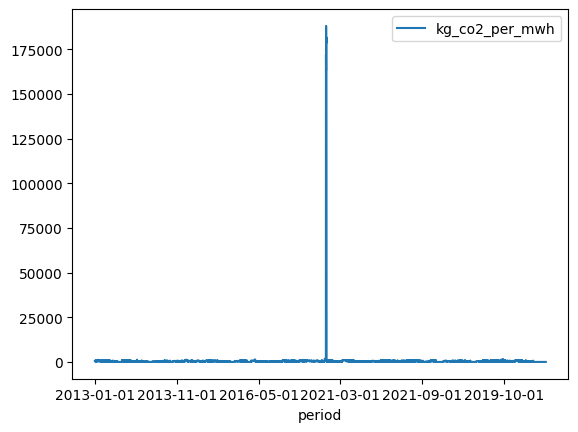

In [1868]:
gen_norm.plot(x='period',y='kg_co2_per_mwh')

In [1869]:
# drop outlier carbon intensity values
gen_norm = gen_norm.drop(gen_norm[gen_norm.kg_co2_per_mwh > 1000].index)

<Axes: xlabel='period'>

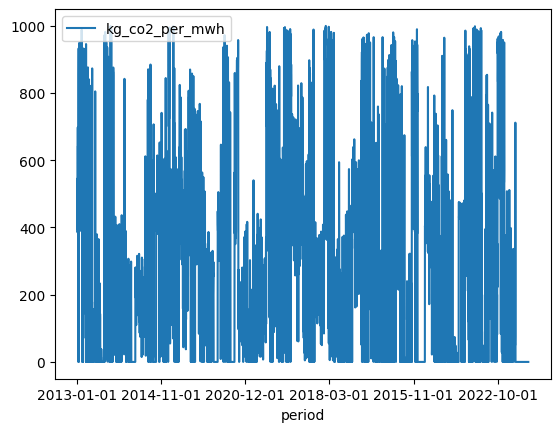

In [1870]:
gen_norm.plot(x='period',y='kg_co2_per_mwh')

Use Fast Fourier Transform to check for actual seasonality in the response variable

In [1871]:
ci_monthly = gen_norm.groupby('period')['kg_co2_per_mwh'].mean()
ci_monthly.head()

period
2013-01-01    425.791310
2013-02-01    420.214739
2013-03-01    352.115789
2013-04-01    439.209743
2013-05-01    357.093198
Name: kg_co2_per_mwh, dtype: float64

In [1872]:
type(ci_monthly)

<class 'pandas.core.series.Series'>

Text(0.5, 0, '# Cycles in full window of data (~5 years)')

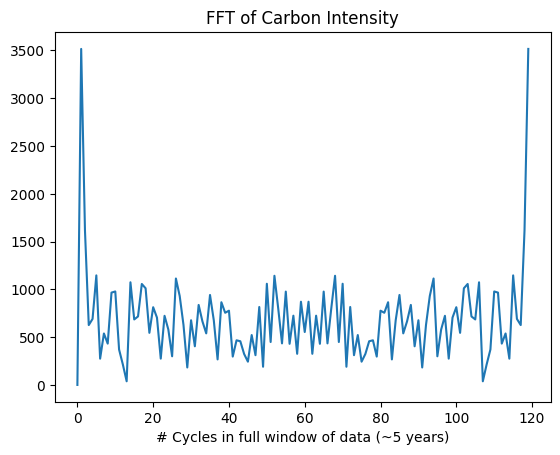

In [1873]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt

# apply FFT to emissions intensity deviation from mean
fft_ci = fft((ci_monthly - ci_monthly.mean()).values)

# plot emissions intensity deviation in frequency domain
plt.plot(np.abs(fft_ci))
plt.title("FFT of Carbon Intensity")
plt.xlabel('# Cycles in full window of data (~5 years)')

Text(0.5, 0, 'Frequency ($y^{-1}$)')

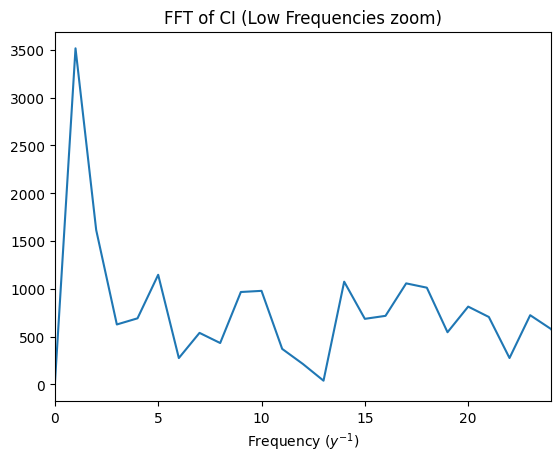

In [1874]:
# zoom on sub-annual frequencies
plt.plot(np.abs(fft_ci))
plt.title("FFT of CI (Low Frequencies zoom)")
plt.xlim([0,24])
plt.xlabel('Frequency ($y^{-1}$)')

Add features to reflect hypothesized annual and 6-month seasonality. Seasonal variations are expected in solar irradiance (annual cycle) and demand (~6-month cycle due to heating demand in winter and cooling demand in summer)

In [1875]:
gen_norm['period'] = pd.to_datetime(gen_norm['period'])
# create Julian date column (days since noon on 1 Jan 4713 BC)
gen_norm['julian'] = gen_norm['period'].apply(lambda x : pd.Timestamp(x).to_julian_date())
# create sine and cosine of time features
gen_norm['sin_year'] = np.sin(gen_norm['julian'] / 365.25 * 2 * np.pi)
gen_norm['cos_year'] = np.cos(gen_norm['julian'] / 365.25 * 2 * np.pi)
gen_norm['sin_6mo'] = np.sin(gen_norm['julian'] / (365.25/2) * 2 * np.pi)
gen_norm['cos_6mo'] = np.cos(gen_norm['julian'] / (365.25/2) * 2 * np.pi)
gen_norm = gen_norm.drop(columns=['julian'])

Examine features graphically

In [1876]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'gen_mwh', 'co2_kton', 'kg_co2_per_mwh', 'total_cap_mw', 'NG_price',
       'avg_mw_per_cap', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo'],
      dtype='object')

In [1877]:
test = list(gen_norm.columns.values)
test

['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO', 'gen_mwh', 'co2_kton', 'kg_co2_per_mwh', 'total_cap_mw', 'NG_price', 'avg_mw_per_cap', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo']

In [1878]:
not_features = ['ba_code', 'index', 'period', 'kg_co2_per_mwh', 'gen_mwh', 'co2_kton', 'total_cap_mw',]
X_names = [i for i in list(gen_norm.columns.values) if i not in not_features]
X_names

['av_lat', 'av_lon', 'BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO', 'NG_price', 'avg_mw_per_cap', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo']

C:\Users\lilye\AppData\Local\Temp\ipykernel_25896\2468694431.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


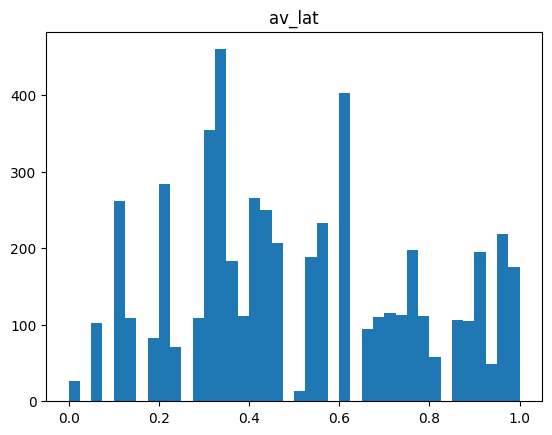

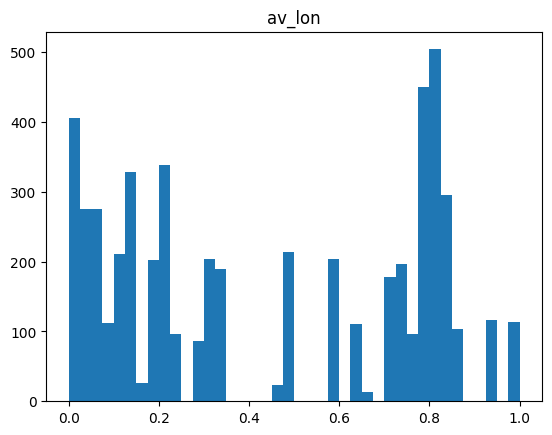

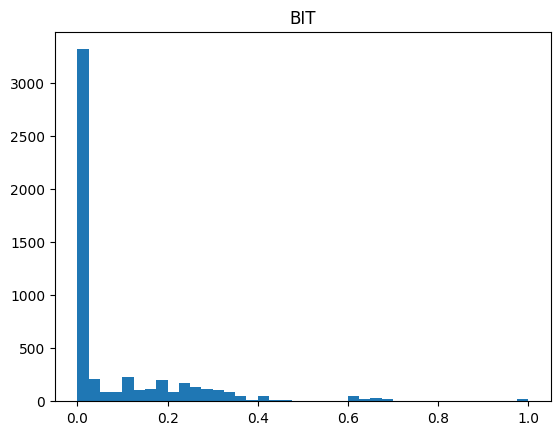

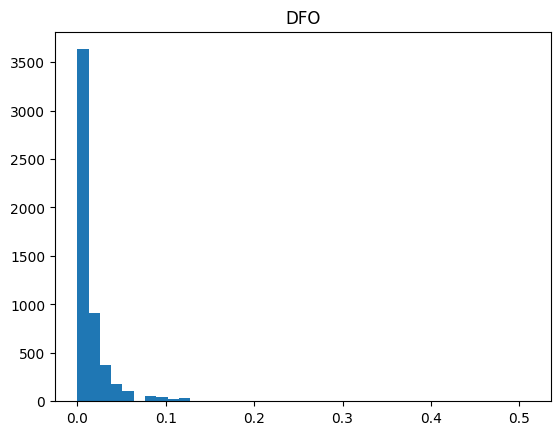

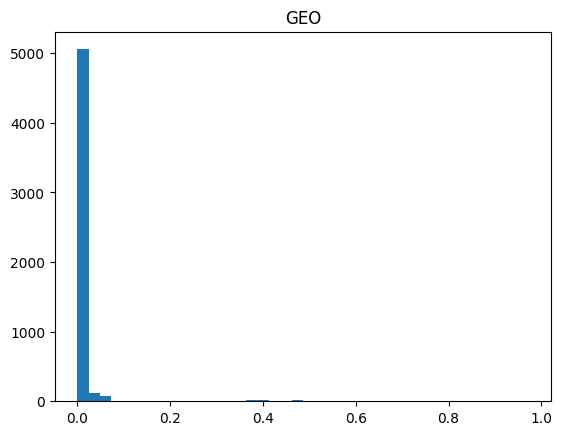

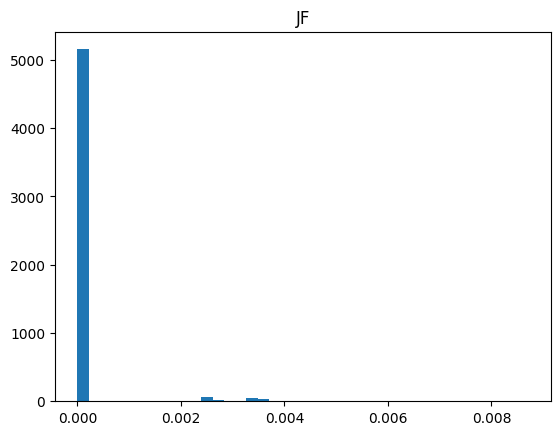

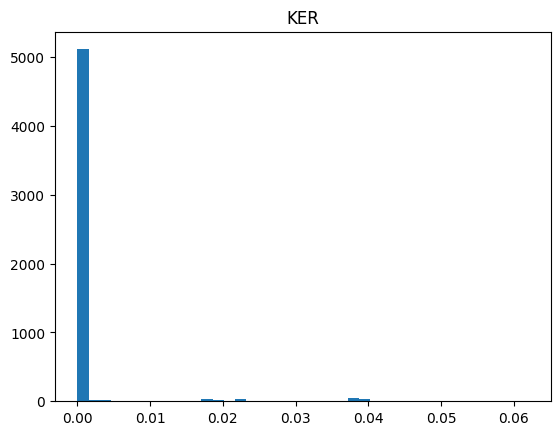

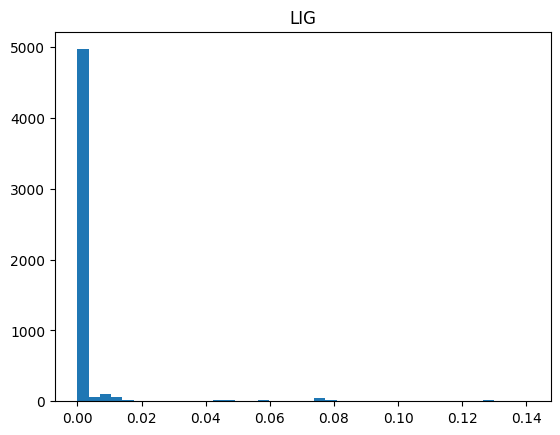

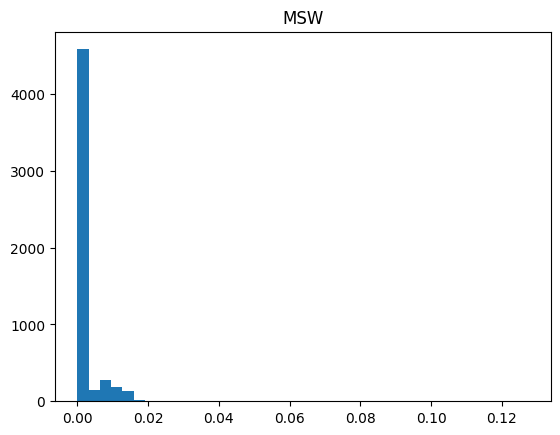

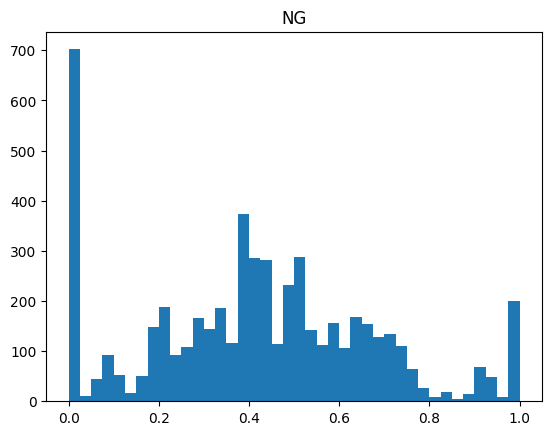

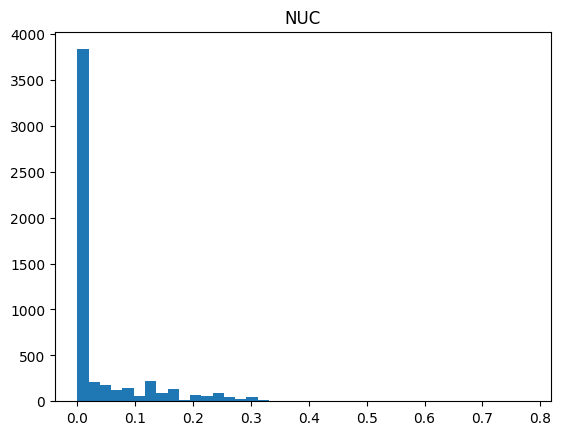

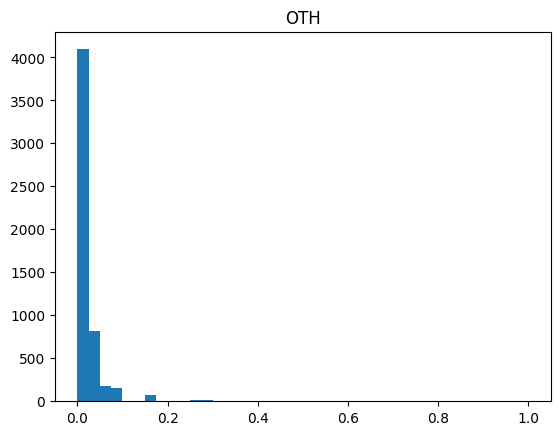

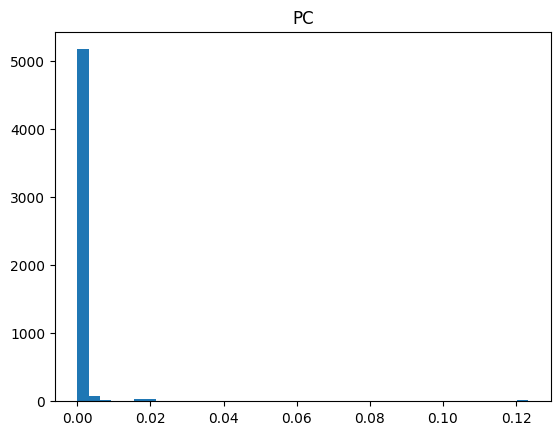

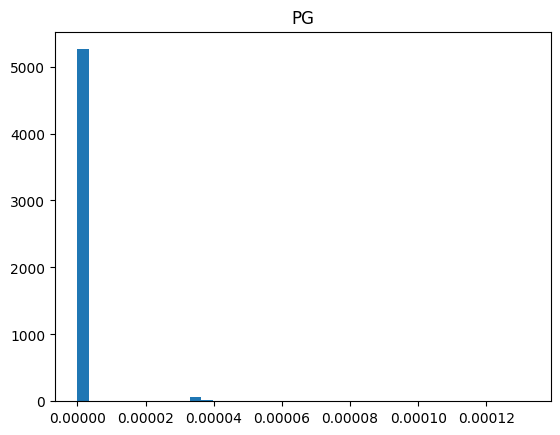

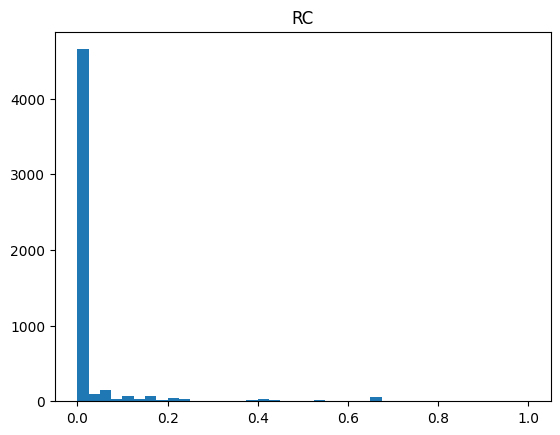

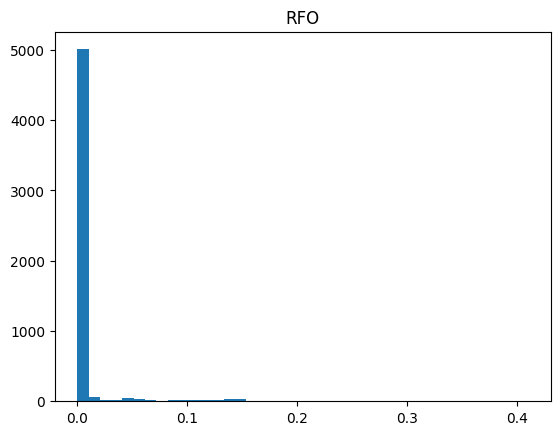

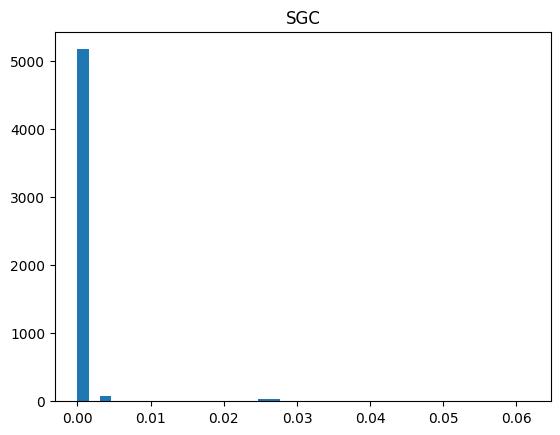

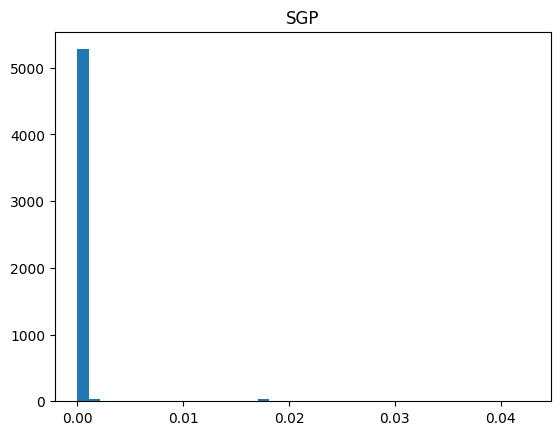

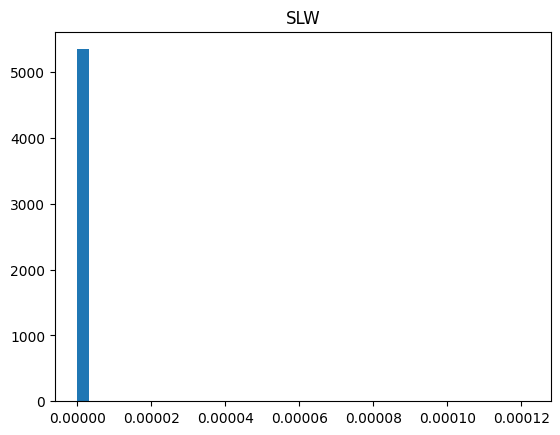

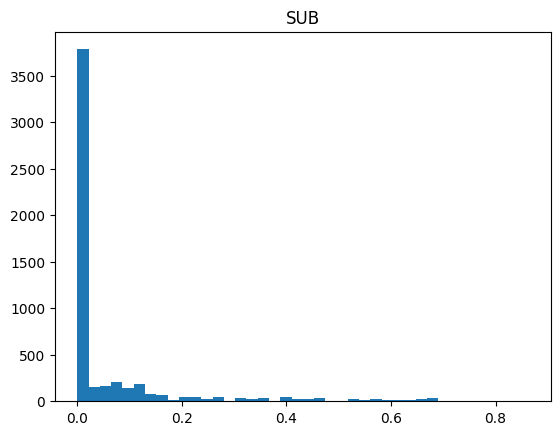

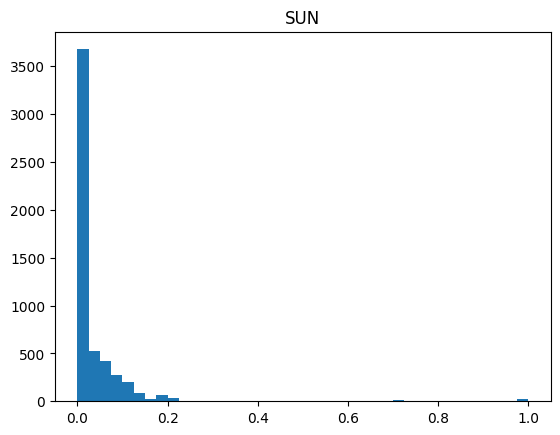

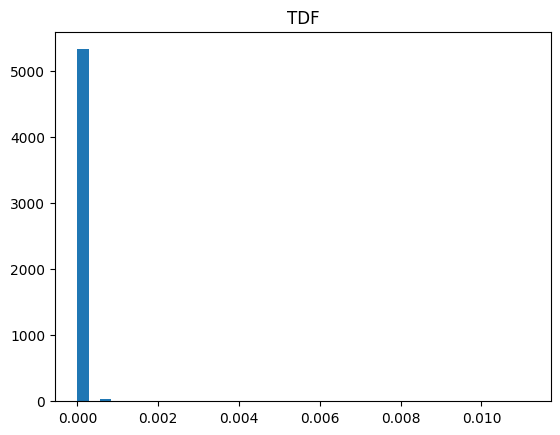

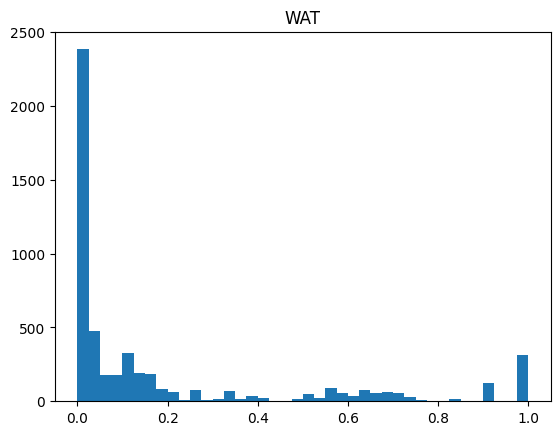

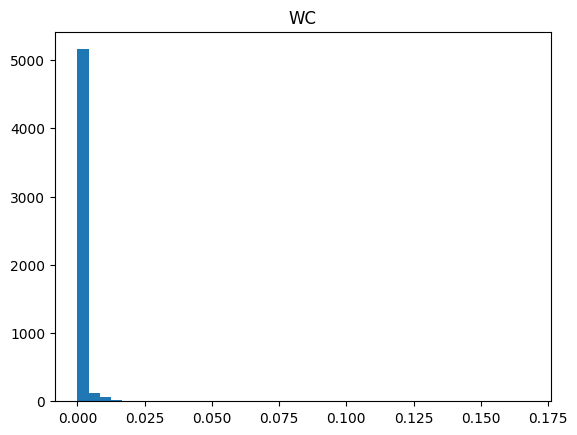

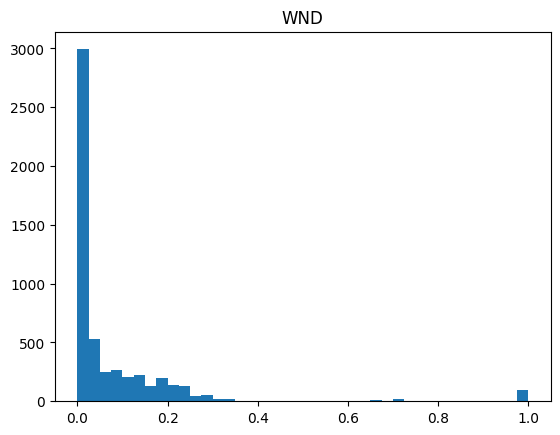

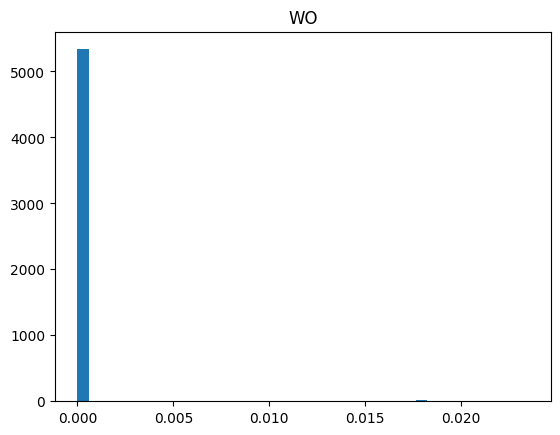

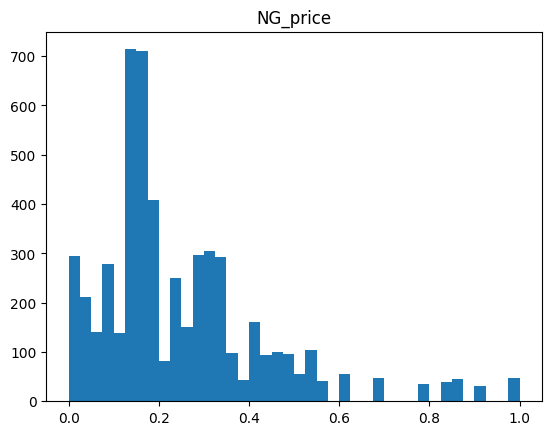

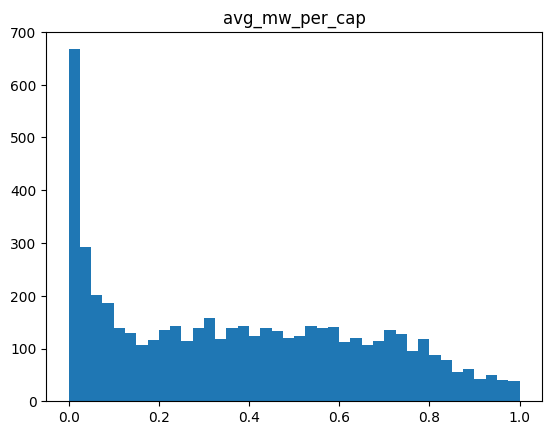

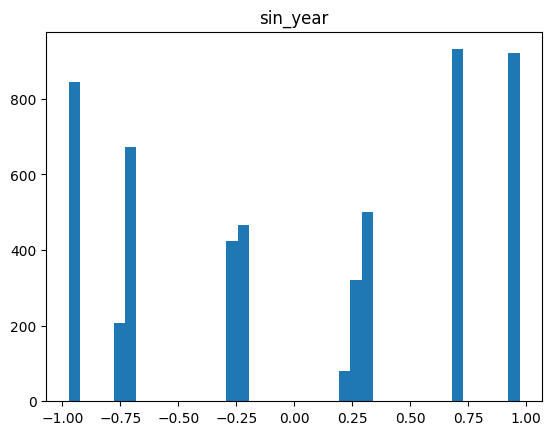

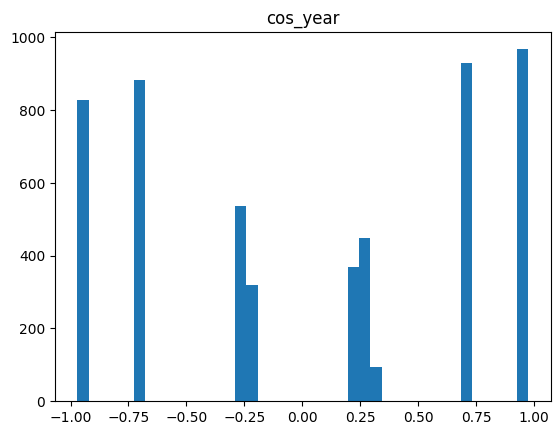

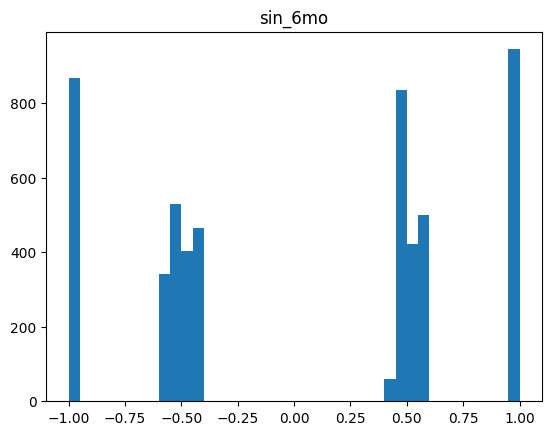

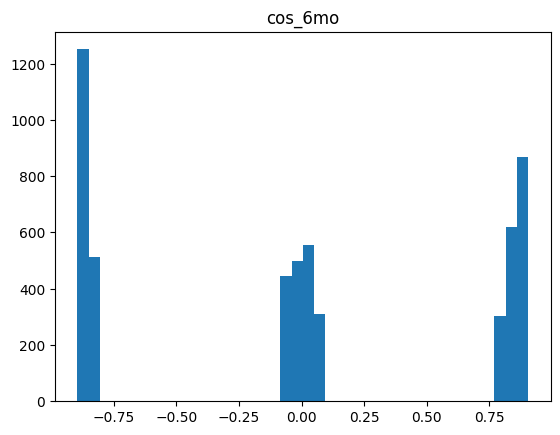

In [1879]:

for X in X_names:
    plt.figure()
    plt.title(X)
    plt.hist(gen_norm[X], bins=40)


In [1880]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,NG_price,avg_mw_per_cap,sin_year,cos_year,sin_6mo,cos_6mo
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,851290.86,447.537907,525.716800,1881.0,0.236769,0.608298,-0.217577,0.976043,-0.424728,0.905321
53,AEC,63,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,827083.18,451.042088,545.340661,1881.0,0.236769,0.591000,0.308812,0.951123,0.587437,0.809270
107,AEC,126,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,658524.00,253.791069,385.393803,1881.0,0.303621,0.470554,0.714292,0.699848,0.999791,-0.020426
158,AEC,189,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,298048.22,118.591618,397.894067,1881.0,0.353760,0.212973,0.970882,0.239557,0.465162,-0.885225
212,AEC,252,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,71425.16,44.451702,622.353546,1881.0,0.335655,0.051038,0.962652,-0.270742,-0.521260,-0.853398


Most features appear right-skewed. Apply log transform using log(1+X). Avoids undefined result at log(0).

In [1881]:
import numpy as np

# list feature names to log transform
no_log = ['av_lat', 'av_lon', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo']
X_to_log = [i for i in X_names if i not in no_log]
X_log_names = [f"log_{i}" for i in X_to_log]
gen_norm[X_log_names] = gen_norm[X_to_log].apply(lambda x: np.log(1+x))
gen_norm.head()


,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,log_SLW,log_SUB,log_SUN,log_TDF,log_WAT,log_WC,log_WND,log_WO,log_NG_price,log_avg_mw_per_cap
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.212502,0.475176
53,AEC,63,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.212502,0.464363
107,AEC,126,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.265146,0.385640
158,AEC,189,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.302886,0.193074
212,AEC,252,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.289422,0.049778


In [1882]:
# one hot encode by BA
gen_norm['ba'] = gen_norm['ba_code']
gen_norm = pd.get_dummies(gen_norm, columns=['ba'], dtype=np.uint8)

In [1883]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,ba_TEC,ba_TEPC,ba_TPWR,ba_TVA,ba_WACM,ba_WALC,ba_WAUE,ba_WAUW,ba_WWA,ba_YAD
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53,AEC,63,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
107,AEC,126,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
158,AEC,189,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
212,AEC,252,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Correlation Matrix

<Axes: >

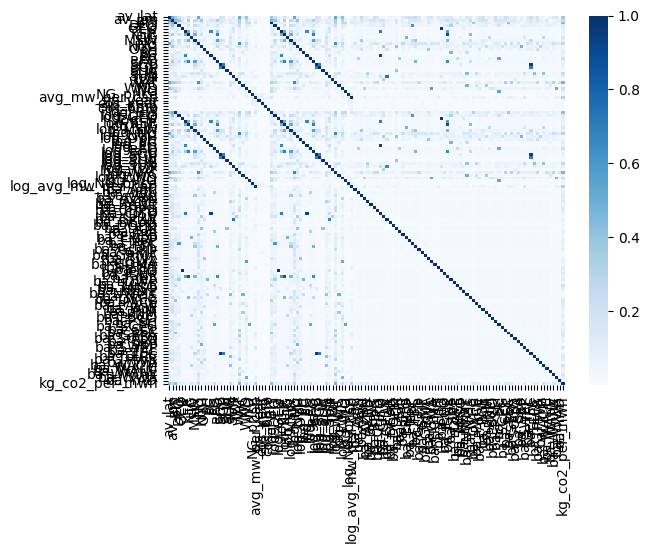

In [2195]:
import seaborn as sns

sns.heatmap(data=abs(gen_norm[X_names + ['kg_co2_per_mwh']].corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

Select feature names manually

In [1885]:
X_names = [i for i in list(gen_norm.columns.values) if i not in not_features]
X_names

['av_lat', 'av_lon', 'BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO', 'NG_price', 'avg_mw_per_cap', 'sin_year', 'cos_year', 'sin_6mo', 'cos_6mo', 'log_BIT', 'log_DFO', 'log_GEO', 'log_JF', 'log_KER', 'log_LIG', 'log_MSW', 'log_NG', 'log_NUC', 'log_OTH', 'log_PC', 'log_PG', 'log_RC', 'log_RFO', 'log_SGC', 'log_SGP', 'log_SLW', 'log_SUB', 'log_SUN', 'log_TDF', 'log_WAT', 'log_WC', 'log_WND', 'log_WO', 'log_NG_price', 'log_avg_mw_per_cap', 'ba_AEC', 'ba_AECI', 'ba_AVA', 'ba_AVRN', 'ba_AZPS', 'ba_BANC', 'ba_BPAT', 'ba_CHPD', 'ba_CISO', 'ba_CPLE', 'ba_CPLW', 'ba_DEAA', 'ba_DOPD', 'ba_DUK', 'ba_EEI', 'ba_EPE', 'ba_ERCO', 'ba_FMPP', 'ba_FPC', 'ba_FPL', 'ba_GCPD', 'ba_GRIF', 'ba_GRMA', 'ba_GVL', 'ba_GWA', 'ba_HGMA', 'ba_HST', 'ba_IID', 'ba_IPCO', 'ba_ISNE', 'ba_JEA', 'ba_LDWP', 'ba_LGEE', 'ba_MISO', 'ba_NEVP', 'ba_NWMT', 'ba_NYIS', 'ba_OVEC', 'ba_PACE', 'ba_PACW', 'ba_PGE', 'ba_PJM',

In [1886]:
gen_norm.shape

(5367, 130)

In [1887]:
len(X_names)

123

In [1888]:
# add features
# use SelectKBest and f_regression from scikit-learn to optimize features?

# tune using grid search on k?
# https://machinelearningmastery.com/feature-selection-for-regression-data/

#Ridge regression has built-in cross validation

#random forest regression


In [1889]:
# features to add:  log transformed in same table as untransformed, BAs (1 hot encoding)
# maybe combine florida bpats into one
# or use regions

In [1890]:
'''
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rfr_base.estimators_[0], feature_names=X_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('tree', view=True)
'''

"\nfrom sklearn.tree import export_graphviz\nimport graphviz\n\ndot_data = export_graphviz(rfr_base.estimators_[0], feature_names=X_names, filled=True, rounded=True)\ngraph = graphviz.Source(dot_data, format='png')\ngraph.render('tree', view=True)\n"

### Random Forest Regression with hyperparameter optimization using randomized search cross validation
 * Response variable is CO2 Intensity (kg CO2 per MW-hr generated)
 * Explanatory variables are selected features in the following categories: generator configuration (installed capacity by fuel source), specific power, location (geographical average for BA), seasonality, fuel price (natural gas only), BA (categorical)

In [1891]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def rfrBaseline(X_train, y_train):
    rfr_base = RandomForestRegressor(max_depth=2, min_samples_split=2, n_estimators = 100, random_state=1)
    rfr_base.fit(X_train, y_train)
    return rfr_base

def rfrTrainTune(X_train, y_train):
    rfr = RandomForestRegressor()
    #max_depth and min_samples_split are chosen as hyperparameters
    rs = RandomizedSearchCV(rfr, n_iter=10, param_distributions={'n_estimators': range(50,150,5) \
                        , 'max_depth': range(1,30) \
                        , 'min_samples_split':range(2,30) \
                        , 'max_features': ['sqrt', 'log2', None]} \
                        , cv=5, n_jobs=-1, random_state=7, scoring='r2')
    rs.fit(X_train, y_train)
    print(f"rs best params:  {rs.best_params_}")
    print(f"rs best score  {rs.best_score_}")
    # apply best hyperparameter values to random forest regression model
    rfr_tuned = RandomForestRegressor(**rs.best_params_, random_state=42)
    # fit tuned model to data set 
    rfr_tuned.fit(X_train, y_train)
    return rfr_tuned

def rfrTest(rfr_model, X_test, y_test):
    y_pred = rfr_model.predict(X_test)
    error = abs(y_pred - y_test)
    mae = np.mean(error)
    mape = 100 * np.mean(error / y_test)
    accuracy = 100 - mape
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Model Performance')
    print(f"R squared:  {r2}")
    print(f"mean squared error:  {mse}")
    print(f"mean absolute error:  {mae}")
    print(f"mean absolute percentage error:  {mape}")
    print(f"accuracy:  {accuracy}")
    return accuracy
    


In [1892]:
X = gen_norm[X_names]
y = gen_norm['kg_co2_per_mwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2, shuffle=True)
rfr_base = rfrBaseline(X_train, y_train)
rfr_tuned = rfrTrainTune(X_train, y_train)
base_acc = rfrTest(rfr_base, X_test, y_test)
tuned_acc = rfrTest(rfr_tuned, X_test, y_test)


rs best params:  {'n_estimators': 110, 'min_samples_split': 13, 'max_features': None, 'max_depth': 17}
rs best score  0.7603293192145643
Model Performance
R squared:  0.39354563714771984
mean squared error:  52090.56955377826
mean absolute error:  179.62509899649538
mean absolute percentage error:  inf
accuracy:  -inf
Model Performance
R squared:  0.7693215323315535
mean squared error:  19813.812053602283
mean absolute error:  94.61839525286572
mean absolute percentage error:  inf
accuracy:  -inf


In [1893]:
def showResiduals(dataset, model, exp_var_names, resp_var_name):
    dataset_check = dataset.copy()
    dataset_check[f"predicted_{resp_var_name}"] = model.predict(dataset_check[exp_var_names])
    dataset_check.plot.scatter(x=resp_var_name, y=f"predicted_{resp_var_name}")

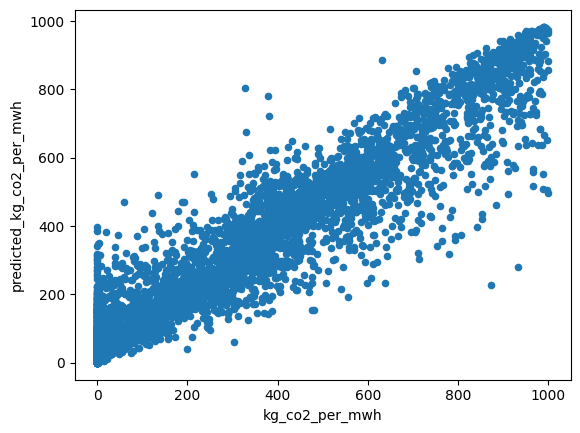

In [1894]:
showResiduals(gen_norm, rfr_tuned, X_names, 'kg_co2_per_mwh')

In [2200]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rfr_tuned.estimators_[0], feature_names=X_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('tree', view=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.995806 to fit


'tree.png'

## Use model to predict how adding 100 MW of solar generation capacity to a Balancing Authority would affect CO2 emissions

In [2164]:
# average most recent two years of reliable configuration data to approximate current configuration (2020 and 2021)
# same for gen_mwh to approximate future generation (~demand)? Or use more years for smoothing?

add_solar_mw = 100

In [2165]:
gen_snap = gen_norm[(gen_norm.period >= '2008-01-01') & (gen_norm.period <= '2023-01-01')]
gen_snap.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,ba_TEC,ba_TEPC,ba_TPWR,ba_TVA,ba_WACM,ba_WALC,ba_WAUE,ba_WAUW,ba_WWA,ba_YAD
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
53,AEC,63,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
107,AEC,126,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
158,AEC,189,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
212,AEC,252,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [2166]:
gen_snap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5367 entries, 0 to 4984
Columns: 130 entries, ba_code to ba_YAD
dtypes: datetime64[ns](1), float64(62), int64(1), object(1), uint8(65)
memory usage: 3.0+ MB


In [2167]:
for c in list(gen_snap.columns.values):
    print(c)

ba_code
index
period
av_lat
av_lon
BIT
DFO
GEO
JF
KER
LIG
MSW
NG
NUC
OTH
PC
PG
RC
RFO
SGC
SGP
SLW
SUB
SUN
TDF
WAT
WC
WND
WO
gen_mwh
co2_kton
kg_co2_per_mwh
total_cap_mw
NG_price
avg_mw_per_cap
sin_year
cos_year
sin_6mo
cos_6mo
log_BIT
log_DFO
log_GEO
log_JF
log_KER
log_LIG
log_MSW
log_NG
log_NUC
log_OTH
log_PC
log_PG
log_RC
log_RFO
log_SGC
log_SGP
log_SLW
log_SUB
log_SUN
log_TDF
log_WAT
log_WC
log_WND
log_WO
log_NG_price
log_avg_mw_per_cap
ba_AEC
ba_AECI
ba_AVA
ba_AVRN
ba_AZPS
ba_BANC
ba_BPAT
ba_CHPD
ba_CISO
ba_CPLE
ba_CPLW
ba_DEAA
ba_DOPD
ba_DUK
ba_EEI
ba_EPE
ba_ERCO
ba_FMPP
ba_FPC
ba_FPL
ba_GCPD
ba_GRIF
ba_GRMA
ba_GVL
ba_GWA
ba_HGMA
ba_HST
ba_IID
ba_IPCO
ba_ISNE
ba_JEA
ba_LDWP
ba_LGEE
ba_MISO
ba_NEVP
ba_NWMT
ba_NYIS
ba_OVEC
ba_PACE
ba_PACW
ba_PGE
ba_PJM
ba_PNM
ba_PSCO
ba_PSEI
ba_SC
ba_SCEG
ba_SCL
ba_SEC
ba_SEPA
ba_SOCO
ba_SPA
ba_SRP
ba_SWPP
ba_TAL
ba_TEC
ba_TEPC
ba_TPWR
ba_TVA
ba_WACM
ba_WALC
ba_WAUE
ba_WAUW
ba_WWA
ba_YAD


In [2168]:
for c in list(gen_snap.columns.values):
    if gen_snap[c].isna().sum() > 0:
        print(f"{c} has {gen_snap[c].isna().sum()} NaN")

In [2169]:
gen_snap.tail()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,ba_TEC,ba_TEPC,ba_TPWR,ba_TVA,ba_WACM,ba_WALC,ba_WAUE,ba_WAUW,ba_WWA,ba_YAD
4745,YAD,6397,2021-06-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4796,YAD,6461,2021-07-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4833,YAD,6518,2021-08-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4937,YAD,6644,2021-10-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4984,YAD,6708,2021-11-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [2170]:
gen_snap = gen_snap.drop(columns=['index'])

In [2171]:
'''
gen_snap = gen_snap.rename(columns={'SUN':'SUN_old'})
gen_snap['SUN'] = (gen_snap['SUN_old'] * gen_snap['total_cap_mw'] + 10) / (gen_snap['total_cap_mw'])
#gen_snap = gen_snap.reset_index()
gen_snap.head()
'''

"\ngen_snap = gen_snap.rename(columns={'SUN':'SUN_old'})\ngen_snap['SUN'] = (gen_snap['SUN_old'] * gen_snap['total_cap_mw'] + 10) / (gen_snap['total_cap_mw'])\n#gen_snap = gen_snap.reset_index()\ngen_snap.head()\n"

In [2172]:
#set feature variables to reflect current conditions, i.e. configuration of BAs
curr_start = '2020-01-01'
curr_end = '2022-01-01'
gen_current = gen_snap[(gen_snap.period > curr_start) & (gen_snap.period <= curr_end)] \
    [['ba_code', 'period'] + X_names]
gen_current.head()


,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,ba_TEC,ba_TEPC,ba_TPWR,ba_TVA,ba_WACM,ba_WALC,ba_WAUE,ba_WAUW,ba_WWA,ba_YAD
3932,AEC,2020-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3986,AEC,2020-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4043,AEC,2020-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4141,AEC,2020-07-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4239,AEC,2020-09-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [2173]:
# set response variables to reflect average over t years as a baseline for comparison

gen_curr_em = gen_snap[(gen_snap.period > curr_start) & (gen_snap.period <= curr_end)] \
    [[i for i in list(gen_snap.columns.values) if i not in X_names]]
gen_curr_em.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw
3932,AEC,2020-03-01,805257.20,359.717206,446.710946,1881.0
3986,AEC,2020-04-01,566163.90,325.509921,574.939378,1881.0
4043,AEC,2020-05-01,56502.00,33.942618,600.733039,1881.0
4141,AEC,2020-07-01,923343.90,382.976891,414.771670,1881.0
4239,AEC,2020-09-01,5818.32,0.000000,0.000000,1881.0


In [2174]:
av_gen_start = '2020-01-01'
av_gen_end = '2022-01-01'
av_generation = gen_snap[(gen_snap.period > av_gen_start) & (gen_snap.period <= av_gen_end)] \
    [['ba_code', 'period', 'gen_mwh']]
av_generation.head()

,ba_code,period,gen_mwh
3932,AEC,2020-03-01,805257.20
3986,AEC,2020-04-01,566163.90
4043,AEC,2020-05-01,56502.00
4141,AEC,2020-07-01,923343.90
4239,AEC,2020-09-01,5818.32


In [2175]:
gen_current['month'] = gen_current['period'].apply(lambda m : pd.to_datetime(m).month)
gen_current = gen_current.drop(columns='period').groupby(['ba_code', 'month']).mean()
gen_current.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code month                                                               
AEC     1      0.247995  0.704795  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  \
        2      0.247995  0.704795  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
        3      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   
        4      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   
        5      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   

                     NG  ...  ba_TEC  ba_TEPC  ba_TPWR  ba_TVA  ba_WACM   
ba_code month            ...                                              
AEC     1      0.990320  ...     0.0      0.0      0.0     0.0      0.0  \
        2      0.990320  ...     0.0      0.0      0.0     0.0      0.0   
        3      0.848695  ...     0.0      0.0      0.0     0.0      0.0   
        4      0.848695  ...     0.0      0.0      0.0     0.0      0.0   
        5      0.848695  ...     0.0      0.0      0.0     0.0      0.0   

               ba_WALC  ba_WAUE  ba_WAUW  ba_WWA  ba_YAD  
ba_code month                                             
AEC     1          0.0      0.0      0.0     0.0     0.0  
        2          0.0      0.0      0.0     0.0     0.0  
        3          0.0      0.0      0.0     0.0     0.0  
        4          0.0      0.0      0.0     0.0     0.0  
        5          0.0      0.0      0.0     0.0     0.0  

[5 rows x 123 columns]

In [2176]:
gen_curr_em['month'] = gen_curr_em['period'].apply(lambda m : pd.to_datetime(m).month)
gen_curr_em = gen_curr_em.drop(columns=['period','gen_mwh']).groupby(['ba_code', 'month']).mean()
gen_curr_em.head()

co2_kton  kg_co2_per_mwh  total_cap_mw
ba_code month                                          
AEC     1      279.255964      397.159462        1343.0
        2       36.934981      553.020546        1343.0
        3      317.677379      418.136648        1612.0
        4      248.263764      486.853392        1612.0
        5      181.888668      502.653658        1612.0

In [2177]:
av_generation['month'] = av_generation['period'].apply(lambda m : pd.to_datetime(m).month)
av_generation = av_generation.drop(columns='period').groupby(['ba_code', 'month']).mean()
av_generation.head()

gen_mwh
ba_code month            
AEC     1      703095.870
        2       66787.720
        3      756407.080
        4      497514.730
        5      435882.845

In [2178]:
gen_hyp = gen_current.join(gen_curr_em).join(av_generation)

In [2179]:
for c in list(gen_hyp.columns.values):
    if gen_hyp[c].isna().sum() > 0:
        print(f"{c} has {gen_hyp[c].isna().sum()} NaN")

In [2180]:
gen_hyp.shape

(663, 127)

In [2181]:
gen_hyp['kg_co2_per_mwh_curr_pred'] = rfr_tuned.predict(gen_hyp[X_names])
gen_hyp.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code month                                                               
AEC     1      0.247995  0.704795  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  \
        2      0.247995  0.704795  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
        3      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   
        4      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   
        5      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   

                     NG  ...  ba_WALC  ba_WAUE  ba_WAUW  ba_WWA  ba_YAD   
ba_code month            ...                                              
AEC     1      0.990320  ...      0.0      0.0      0.0     0.0     0.0  \
        2      0.990320  ...      0.0      0.0      0.0     0.0     0.0   
        3      0.848695  ...      0.0      0.0      0.0     0.0     0.0   
        4      0.848695  ...      0.0      0.0      0.0     0.0     0.0   
        5      0.848695  ...      0.0      0.0      0.0     0.0     0.0   

                 co2_kton  kg_co2_per_mwh  total_cap_mw     gen_mwh   
ba_code month                                                         
AEC     1      279.255964      397.159462        1343.0  703095.870  \
        2       36.934981      553.020546        1343.0   66787.720   
        3      317.677379      418.136648        1612.0  756407.080   
        4      248.263764      486.853392        1612.0  497514.730   
        5      181.888668      502.653658        1612.0  435882.845   

               kg_co2_per_mwh_curr_pred  
ba_code month                            
AEC     1                    419.509866  
        2                    439.925382  
        3                    473.417396  
        4                    487.100488  
        5                    480.253108  

[5 rows x 128 columns]

In [2182]:
gen_hyp = gen_hyp.rename(columns={'SUN':'SUN_old'})
gen_hyp['SUN'] = (gen_hyp['SUN_old'] * gen_hyp['total_cap_mw'] + add_solar_mw) / (gen_hyp['total_cap_mw'] + add_solar_mw)


gen_hyp['kg_co2_per_mwh_hyp_pred'] = rfr_tuned.predict(gen_hyp[X_names])
gen_hyp.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code month                                                               
AEC     1      0.247995  0.704795  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  \
        2      0.247995  0.704795  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
        3      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   
        4      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   
        5      0.247995  0.704795  0.143009  0.0  0.0  0.0  0.0  0.0  0.0   

                     NG  ...  ba_WAUW  ba_WWA  ba_YAD    co2_kton   
ba_code month            ...                                        
AEC     1      0.990320  ...      0.0     0.0     0.0  279.255964  \
        2      0.990320  ...      0.0     0.0     0.0   36.934981   
        3      0.848695  ...      0.0     0.0     0.0  317.677379   
        4      0.848695  ...      0.0     0.0     0.0  248.263764   
        5      0.848695  ...      0.0     0.0     0.0  181.888668   

               kg_co2_per_mwh  total_cap_mw     gen_mwh   
ba_code month                                             
AEC     1          397.159462        1343.0  703095.870  \
        2          553.020546        1343.0   66787.720   
        3          418.136648        1612.0  756407.080   
        4          486.853392        1612.0  497514.730   
        5          502.653658        1612.0  435882.845   

               kg_co2_per_mwh_curr_pred       SUN  kg_co2_per_mwh_hyp_pred  
ba_code month                                                               
AEC     1                    419.509866  0.069300               410.139961  
        2                    439.925382  0.069300               435.834505  
        3                    473.417396  0.058411               440.314759  
        4                    487.100488  0.058411               453.550838  
        5                    480.253108  0.058411               451.873241  

[5 rows x 130 columns]

In [2183]:
gen_hyp = gen_hyp.reset_index()

In [2184]:
gen_hyp.head()

,ba_code,month,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,ba_WAUW,ba_WWA,ba_YAD,co2_kton,kg_co2_per_mwh,total_cap_mw,gen_mwh,kg_co2_per_mwh_curr_pred,SUN,kg_co2_per_mwh_hyp_pred
0,AEC,1,0.247995,0.704795,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,279.255964,397.159462,1343.0,703095.870,419.509866,0.069300,410.139961
1,AEC,2,0.247995,0.704795,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,36.934981,553.020546,1343.0,66787.720,439.925382,0.069300,435.834505
2,AEC,3,0.247995,0.704795,0.143009,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,317.677379,418.136648,1612.0,756407.080,473.417396,0.058411,440.314759
3,AEC,4,0.247995,0.704795,0.143009,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,248.263764,486.853392,1612.0,497514.730,487.100488,0.058411,453.550838
4,AEC,5,0.247995,0.704795,0.143009,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,181.888668,502.653658,1612.0,435882.845,480.253108,0.058411,451.873241


In [2185]:
gen_hyp['co2_kton_curr_pred'] = gen_hyp['gen_mwh'] * gen_hyp['kg_co2_per_mwh_curr_pred'] / 1e6
gen_hyp['co2_kton_hyp_pred'] = gen_hyp['gen_mwh'] * gen_hyp['kg_co2_per_mwh_hyp_pred'] / 1e6

In [2186]:
gen_hyp.head()

,ba_code,month,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,ba_YAD,co2_kton,kg_co2_per_mwh,total_cap_mw,gen_mwh,kg_co2_per_mwh_curr_pred,SUN,kg_co2_per_mwh_hyp_pred,co2_kton_curr_pred,co2_kton_hyp_pred
0,AEC,1,0.247995,0.704795,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,279.255964,397.159462,1343.0,703095.870,419.509866,0.069300,410.139961,294.955654,288.367713
1,AEC,2,0.247995,0.704795,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,36.934981,553.020546,1343.0,66787.720,439.925382,0.069300,435.834505,29.381613,29.108393
2,AEC,3,0.247995,0.704795,0.143009,0.0,0.0,0.0,0.0,0.0,...,0.0,317.677379,418.136648,1612.0,756407.080,473.417396,0.058411,440.314759,358.096270,333.057201
3,AEC,4,0.247995,0.704795,0.143009,0.0,0.0,0.0,0.0,0.0,...,0.0,248.263764,486.853392,1612.0,497514.730,487.100488,0.058411,453.550838,242.339668,225.648223
4,AEC,5,0.247995,0.704795,0.143009,0.0,0.0,0.0,0.0,0.0,...,0.0,181.888668,502.653658,1612.0,435882.845,480.253108,0.058411,451.873241,209.334091,196.963794


<Axes: xlabel='month'>

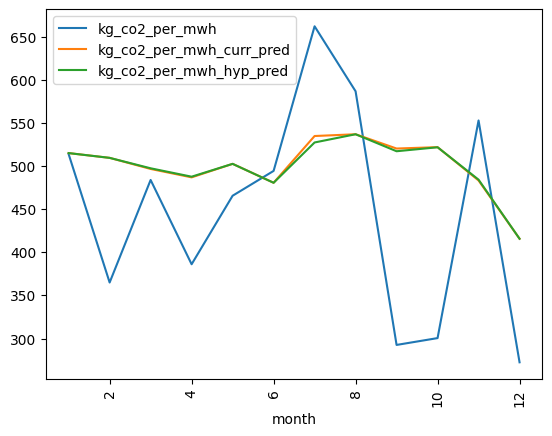

In [2187]:
gen_hyp[gen_hyp.ba_code == 'MISO'].set_index('month')[['kg_co2_per_mwh', \
                        'kg_co2_per_mwh_curr_pred', 'kg_co2_per_mwh_hyp_pred']].plot(rot=90)

<Axes: xlabel='month'>

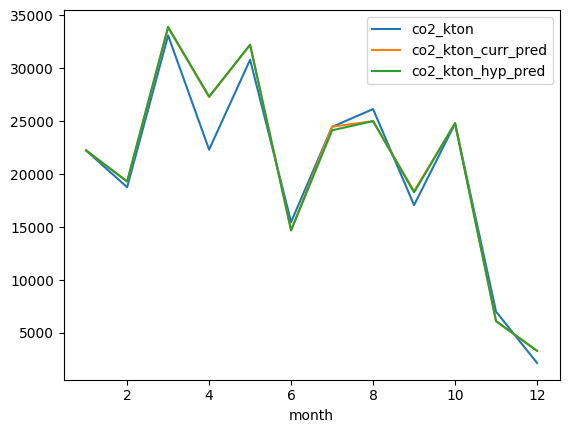

In [2196]:
gen_hyp[gen_hyp.ba_code == 'MISO'].set_index('month')[['co2_kton','co2_kton_curr_pred' \
                                                       , 'co2_kton_hyp_pred']].plot()

<Axes: xlabel='month'>

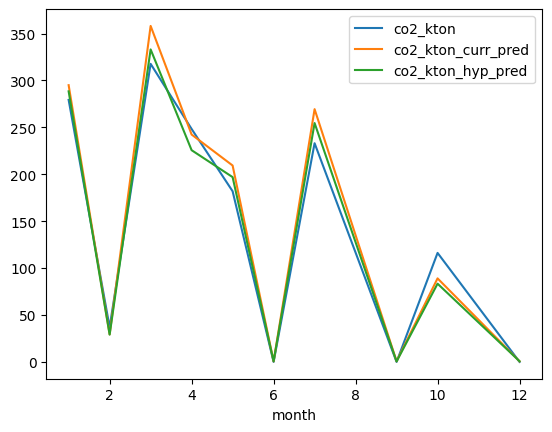

In [2199]:
gen_hyp[gen_hyp.ba_code == 'AEC'].set_index('month')[['co2_kton','co2_kton_curr_pred' \
                                                       , 'co2_kton_hyp_pred']].plot()

<Axes: xlabel='month'>

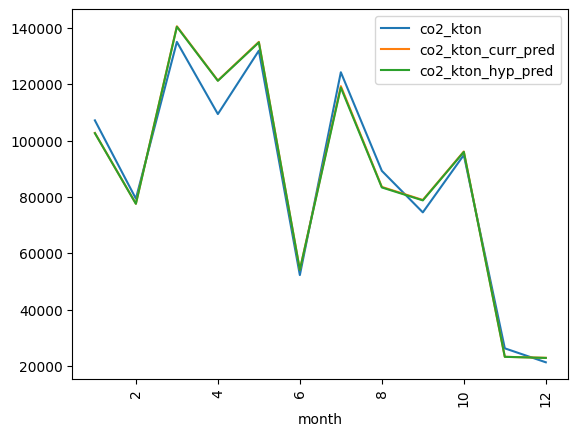

In [2189]:
gen_hyp.groupby('month').sum()[['co2_kton','co2_kton_curr_pred', 'co2_kton_hyp_pred']].plot(rot=90)

In [2190]:
co2_annual = gen_hyp.groupby('ba_code')[['co2_kton','co2_kton_curr_pred' \
                                         , 'co2_kton_hyp_pred']].sum()

In [2191]:
co2_annual['delta_co2_kton_pred'] = co2_annual['co2_kton_hyp_pred'] \
    - co2_annual['co2_kton_curr_pred']

In [2192]:
co2_annual

,co2_kton,co2_kton_curr_pred,co2_kton_hyp_pred,delta_co2_kton_pred
ba_code,,,,
AEC,1413.281062,1494.519333,1413.005143,-81.514190
AECI,10500.649182,10329.159554,10353.535982,24.376428
AVA,563.640676,430.493902,430.308787,-0.185115
AVRN,0.000000,8.309915,12.947780,4.637865
AZPS,8149.386209,8001.585998,7808.252270,-193.333728
...,...,...,...,...
WACM,28258.704626,27617.719966,27631.015711,13.295744
WALC,2789.079192,3024.345435,3025.854186,1.508751
WAUW,0.000000,0.048891,2.150755,2.101864


<Axes: ylabel='ba_code'>

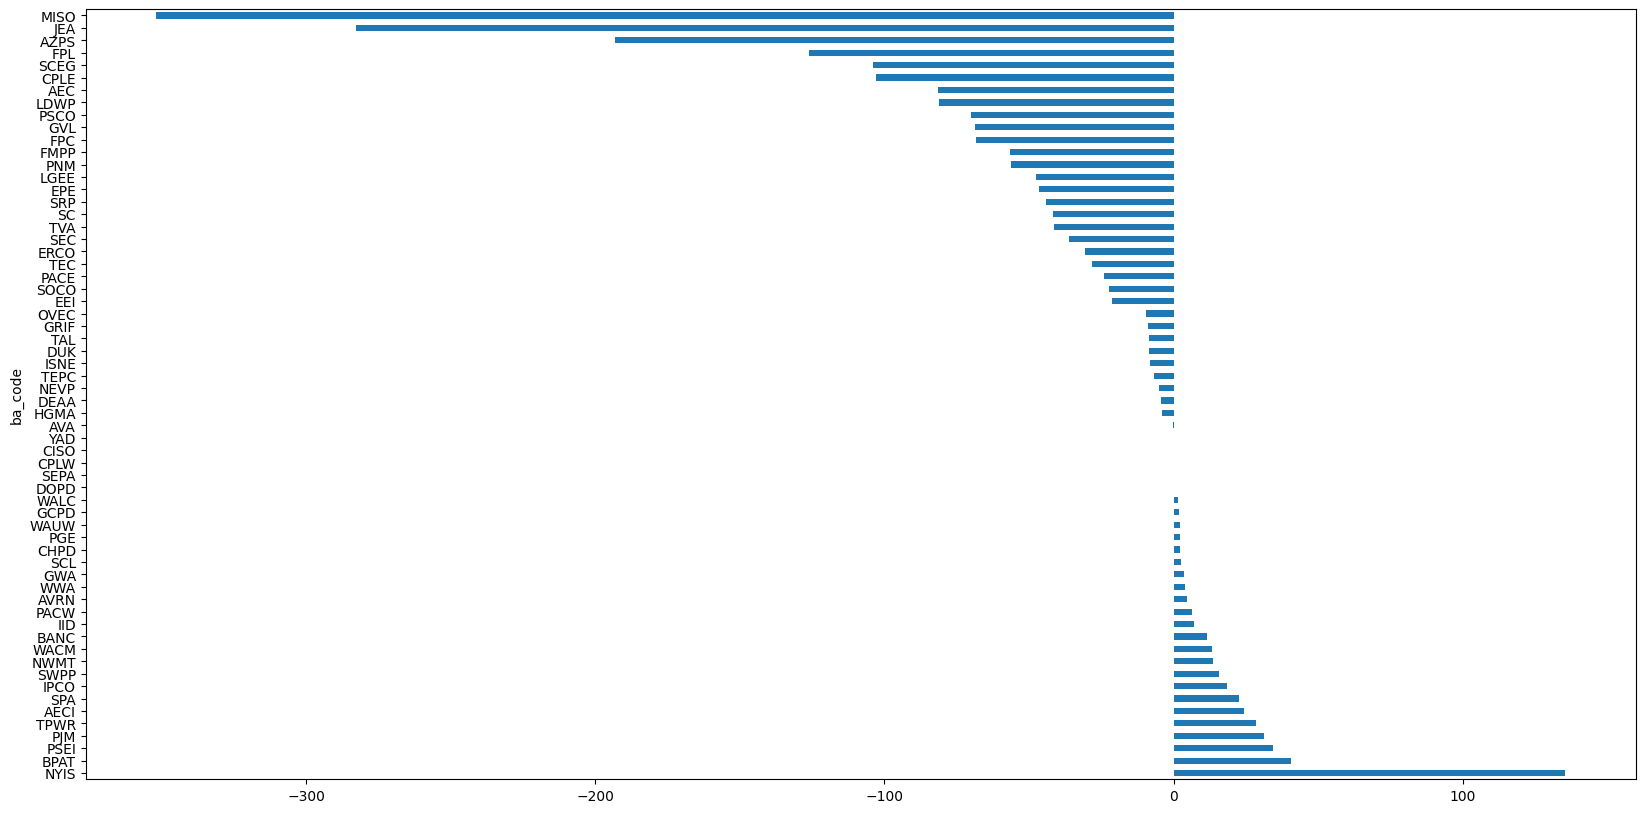

In [2193]:
co2_annual['delta_co2_kton_pred'].sort_values(ascending=False).plot(kind='barh', figsize = (20,10))
